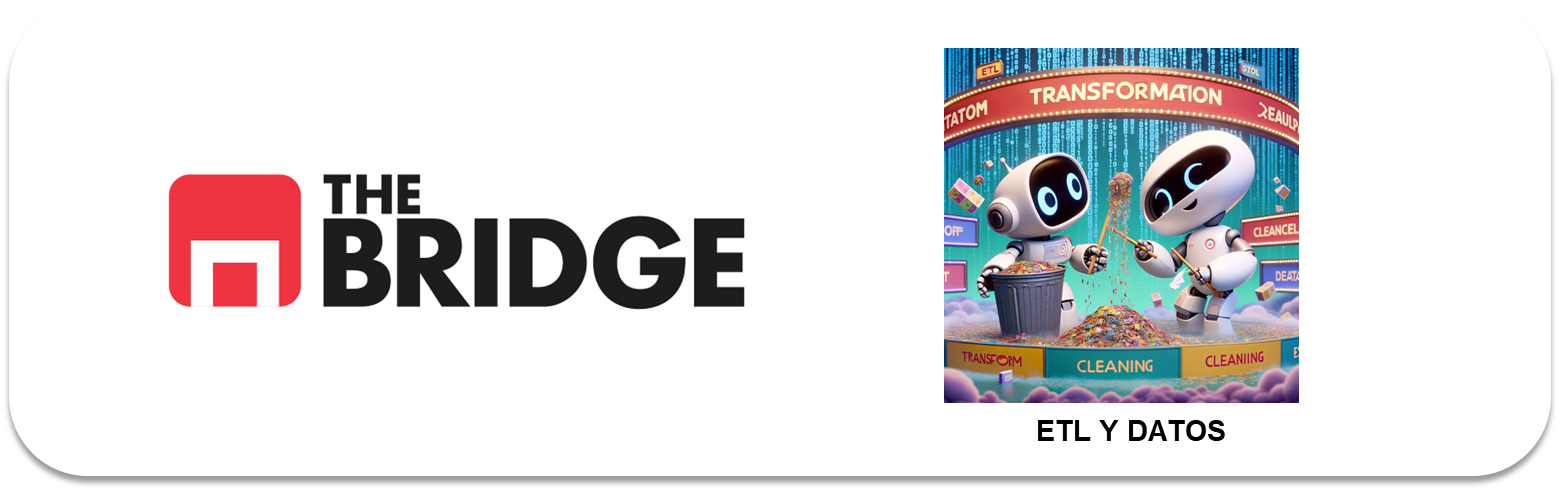

## PRACTICA OBLIGATORIA: Acceso Ficheros

* La práctica obligatoria de esta unidad consiste en varios ejercicios con tres tipos de ficheros (txt,excel y xml). Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## #0 Qué fichero para qué cosa

La librería `os` proporciona una serie de funciones para trabajar con archivos y hacer operaciones del sistema operativo. Importa la librería y haz uso de la función `listdir` para poder ver los ficheros que hay en el subdirectorio `data` que acompaña a este notebook.

In [1]:
import os

# os.listdir(directorio>) da una lista de los archivos contenidos en <directorio>
# prueba a ejecutar lo siguiente
for fichero in os.listdir("./data"):
    print(fichero)

city_sales.xlsx
mbox.txt
OptaF24.xml


1. Ahora crea una variable `fichero_texto`, otra `fichero_excel` y otra `fichero_xml` y asigna a cada una la ruta para acceder a cada tipo de fichero que te hayas encontrado en la salida del apartado anterior. Como recordarás una ruta es el camino para acceder a un fichero, en este caso incluye el path y el nombre del fichero (ojo os.listdir no te da el path, te da el nombre del fichero)

In [2]:
fichero_texto = os.path.join("./data", "mbox.txt")
fichero_excel = os.path.join("./data", "city_sales.xlsx")
fichero_xml = os.path.join("./data", "OptaF24.xml")

## #1 Fichero excel

Vamos a empezar trabajando con el fichero excel. 

1. Importa las librerías necesarias y carga los datos en un `DataFrame` el fichero cuya ruta has asignado a `fichero_excel`. Usa los argumentos necesarios para una correcta lectura

In [3]:
import pandas as pd
df = pd.read_excel(fichero_excel,sheet_name=1)
df

ValueError: Worksheet index 1 is invalid, 1 worksheets found

In [ ]:
df = pd.read_excel(fichero_excel,sheet_name=1, usecols = "D:F,H", skiprows = 4)
df

,Unnamed: 3,date,num,city
0,1552600,2016-11-16 15:13:00,3,Cambridge
1,345468,2018-02-22 13:08:00,3,London
2,1012061,2016-01-15 15:38:00,3,Durham
3,21651,2015-03-13 12:00:00,3,London
4,769095,2017-11-30 14:49:00,4,Oxford
...,...,...,...,...
39995,304177,2017-10-09 12:35:00,4,London
39996,1416565,2015-08-21 14:21:00,3,Cambridge
39997,1036946,2016-04-08 09:23:00,4,Durham
39998,228005,2017-01-27 13:04:00,3,London


2. Renombra la primera columna para que se llame "revenue" y la columna "num" por "sales"

In [ ]:
df.columns

Index(['Unnamed: 3', 'date', 'num', 'city'], dtype='object')

In [ ]:
df.rename(columns={"Unnamed: 3": "revenue",'num': 'sales'}, inplace=True)
df

,revenue,date,sales,city
0,1552600,2016-11-16 15:13:00,3,Cambridge
1,345468,2018-02-22 13:08:00,3,London
2,1012061,2016-01-15 15:38:00,3,Durham
3,21651,2015-03-13 12:00:00,3,London
4,769095,2017-11-30 14:49:00,4,Oxford
...,...,...,...,...
39995,304177,2017-10-09 12:35:00,4,London
39996,1416565,2015-08-21 14:21:00,3,Cambridge
39997,1036946,2016-04-08 09:23:00,4,Durham
39998,228005,2017-01-27 13:04:00,3,London


In [ ]:
df.columns = ["revenue","date","sales","city"]

3. Muestra los tipos de datos, valores totales, etc.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   revenue  40000 non-null  int64 
 1   date     40000 non-null  object
 2   sales    40000 non-null  int64 
 3   city     40000 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,revenue,sales
count,4.000000e+04,40000.000000
mean,8.972235e+05,2.800325
std,5.179151e+05,0.874714
min,5.000000e+00,1.000000
25%,4.520900e+05,2.000000
50%,8.949420e+05,3.000000
75%,1.345200e+06,3.000000
max,1.795098e+06,4.000000


In [ ]:
df.city.value_counts()

city
Oxford       10126
Cambridge     9971
Durham        9966
London        9937
Name: count, dtype: int64

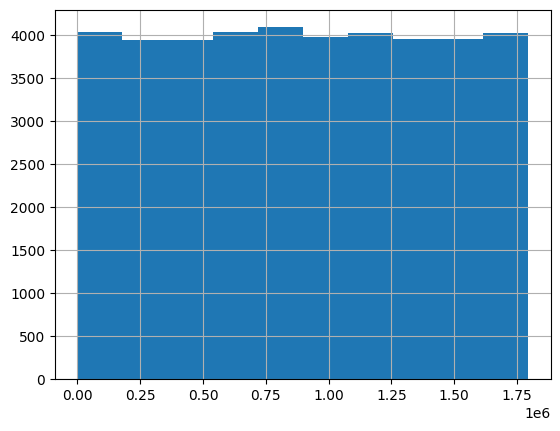

In [ ]:
df.revenue.hist();

<Axes: >

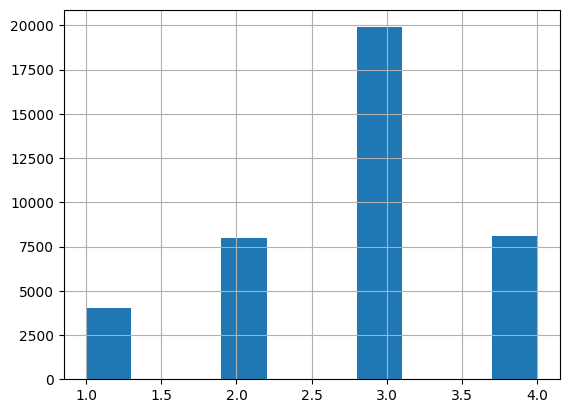

In [ ]:
df.sales.hist()

4. Convierte el campo "date" a un datetime. Conviertelo en el índice del `DataFrame`

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df


,revenue,date,sales,city
0,1552600,2016-11-16 15:13:00,3,Cambridge
1,345468,2018-02-22 13:08:00,3,London
2,1012061,2016-01-15 15:38:00,3,Durham
3,21651,2015-03-13 12:00:00,3,London
4,769095,2017-11-30 14:49:00,4,Oxford
...,...,...,...,...
39995,304177,2017-10-09 12:35:00,4,London
39996,1416565,2015-08-21 14:21:00,3,Cambridge
39997,1036946,2016-04-08 09:23:00,4,Durham
39998,228005,2017-01-27 13:04:00,3,London


In [ ]:
df.set_index("date", inplace = True)
df

,revenue,sales,city
date,,,
2016-11-16 15:13:00,1552600,3,Cambridge
2018-02-22 13:08:00,345468,3,London
2016-01-15 15:38:00,1012061,3,Durham
2015-03-13 12:00:00,21651,3,London
2017-11-30 14:49:00,769095,4,Oxford
...,...,...,...
2017-10-09 12:35:00,304177,4,London
2015-08-21 14:21:00,1416565,3,Cambridge
2016-04-08 09:23:00,1036946,4,Durham


5. Muestra las ventas agrupadas por ciudad entre 2017 y 2018 y lo mismo con los ingresos ("revenue")

In [ ]:
df.sort_index(inplace=True)
df.loc["2017":"2018"].groupby("city").sum()

,revenue,sales
city,,
Cambridge,8263779633,13715
Durham,6000637498,13687
London,1588248522,13492
Oxford,3920841678,14229


5. Sobreescribe el fichero excel guardando el dataframe sin indice, pero sin perder la columna "date" en una hoja de nombre "clean_data"

In [ ]:
df.to_excel(fichero_excel, sheet_name="clean_data")

## #2 Texto

Vamos a leer ahora el fichero indicado en la ruta contenida en `fichero_texto`, el objetivo es procesar el contenido para construir un `DataFrame` con lassiguientes  columnas direcciones de correo del emisor, veredicto de si es spam o no y confidencia en ese veredicto.

1. Crea un diccionario con las siguientes claves: "from","to","is_spam","confidence" y que cada una tenga una lista vacia.

In [4]:
diccionario_spam = {
    "from" : [], 
    "to" : [], 
    "is_spam" : [],
    "confidence" : []
}

2. Lee el fichero (usando `with open...`) y muestra las primeras 30 filas por pantalla, así podrás ver como es más o menos la estructura del mismo

In [5]:
with open(fichero_texto) as f:
    indice = 0
    for linea in f:
        print(linea, end = "")
        indice += 1
        if indice > 60: 
            break

From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
Return-Path: <postmaster@collab.sakaiproject.org>
Received: from murder (mail.umich.edu [141.211.14.90])
	 by frankenstein.mail.umich.edu (Cyrus v2.3.8) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
X-Sieve: CMU Sieve 2.3
Received: from murder ([unix socket])
	 by mail.umich.edu (Cyrus v2.2.12) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
Received: from holes.mr.itd.umich.edu (holes.mr.itd.umich.edu [141.211.14.79])
	by flawless.mail.umich.edu () with ESMTP id m05EEFR1013674;
	Sat, 5 Jan 2008 09:14:15 -0500
Received: FROM paploo.uhi.ac.uk (app1.prod.collab.uhi.ac.uk [194.35.219.184])
	BY holes.mr.itd.umich.edu ID 477F90B0.2DB2F.12494 ; 
	 5 Jan 2008 09:14:10 -0500
Received: from paploo.uhi.ac.uk (localhost [127.0.0.1])
	by paploo.uhi.ac.uk (Postfix) with ESMTP id 5F919BC2F2;
	Sat,  5 Jan 2008 14:10:05 +0000 (GMT)
Message-ID: <200801051412.m05ECIaH010327@nakamura.uits.iupui.edu>
Mime-Version: 1.0
Content-Transfer-Encoding: 7bit
R

3. Ahora sabemos que el emisor viene después de "To:" el receptor después de "From:" el resultado de Spam tras "X-DSPAM-Result" y el nivel de confianza tras "X-DSPAM-Confidence", crea un programa que lea el fichero y a medida que va leyendo el texto añada cada valor (emisor, receptor, si es spam o no, nivel de confianza) a cada una de las listas del diccionario creado en 1.  
Por ejemplo, cuando llegue a una línea con "To:" que añada el correo a <diccionario>["to"]

In [6]:
with open (fichero_texto) as f:
    for linea in f:
        if linea.startswith("From:"): 
            diccionario_spam["from"].append(linea.replace("\n","").replace ("From:","").strip())
        elif linea.startswith("To:"):
            diccionario_spam["to"].append(linea.replace("\n","").replace("To:","").strip())
        elif linea.startswith("X-DSPAM-Result:"): 
            resultado = linea.replace("\n","").replace ("X-DSPAM-Result:","").strip()
            diccionario_spam["is_spam"].append(resultado != "Innocent")
        elif linea.startswith("XDSPAM-Confidence:"):
            confianza = float(linea.replace("\n","").replace("X-DSPAM-Confidence:","").strip())
            diccionario_spam["confidence"].append(confianza)

In [7]:
diccionario_spam

{'from': ['stephen.marquard@uct.ac.za',
  'louis@media.berkeley.edu',
  'zqian@umich.edu',
  'rjlowe@iupui.edu',
  'zqian@umich.edu',
  'rjlowe@iupui.edu',
  'cwen@iupui.edu',
  'cwen@iupui.edu',
  'gsilver@umich.edu',
  'gsilver@umich.edu',
  'zqian@umich.edu',
  'gsilver@umich.edu',
  'wagnermr@iupui.edu',
  'zqian@umich.edu',
  'antranig@caret.cam.ac.uk',
  'gopal.ramasammycook@gmail.com',
  'david.horwitz@uct.ac.za',
  'david.horwitz@uct.ac.za',
  'david.horwitz@uct.ac.za',
  'david.horwitz@uct.ac.za',
  'stephen.marquard@uct.ac.za',
  'louis@media.berkeley.edu',
  'louis@media.berkeley.edu',
  'ray@media.berkeley.edu',
  'cwen@iupui.edu',
  'cwen@iupui.edu',
  'cwen@iupui.edu'],
 'to': ['source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@collab.sakaiproject.org',
  'source@col

In [8]:
import re
claves = {
    "From:" : "from",
    "To:" : "to",
    "X-DSPAM-Confidence:" : "confidence",
    "X-DSPAM-Result:": "is_spam"
}
with open(fichero_texto) as f:
    for linea in f:
        parser = re.match("(From:|To:|X-DSPAM-Result:|X-DSPAM-Confidence:)(.+)",linea)
        if parser:
            diccionario_spam[claves[parser.group(1)]].append(parser.group(2) if "Result" not in parser.group(1) else parser.group(2) == "Inocent") 

4. Recorre el diccionario y muestra el número de valores de cada lista (no los valores, ojo). Es para que compruebes que todos tienen la misma longitud

In [9]:
for clave, valor in diccionario_spam.items():
    print(f"clave: {clave}, tienen {len(valor)} elementos")

clave: from, tienen 54 elementos
clave: to, tienen 54 elementos
clave: is_spam, tienen 54 elementos
clave: confidence, tienen 27 elementos


Si las cuatro listas no te salen del mismo valor, repasa el código del apartado anterior.

5. Ahora ya crea un dataframe a partir del diccionario y muestra si hay algún correo declarado como spam y la confianza media. (quizá tengas que cambiar el tipo de la columna)

In [ ]:
df = pd.DataFrame(diccionario_spam)



6. Grába el dataframe en un fichero csv en la ruta "./data/spam.csv" con el "|" de separador y sin índice:

## #3 XML

Es hora de procesar el fichero con la ruta xml. Carga las liberias necesarias:

In [10]:
import xml.etree.ElementTree as ET

1. Lee el fichero tal y como has visto hacerlo en el workout, con la función `parse` de la libería adecuada (la que has importado en la celda superior)

In [11]:
tree = ET.parse(fichero_xml)

2. Asigna el nodo raíz a la variable `ejer_raiz` y muestra su etiqueta (y sus atributos, si es que tiene)

In [13]:
ejer_raiz = tree.getroot()
ejer_raiz.tag
if hasattr(ejer_raiz, "attrib"):
    print(ejer_raiz.attrib)


{'timestamp': '2012-09-11T10:20:32'}


3. Muestra cuantos hijos y nietos tiene el nodo raiz y la etiqueta de cada uno:

In [14]:
tags_hijo = []
for indice, hijo in enumerate(ejer_raiz,1): #el 1 es el offset para empecar a contar
    tags_hijo.append(hijo.tag)
    tags_nieto = []
    for nieto in hijo: 
        tags_nieto.append(nieto.tag)
    print(f"Nodos para hijo {indice} con etiqueta tag: {hijo.tag}")
    print("\t", len(tags_nieto),list(set(tags_nieto)))
print()

Nodos para hijo 1 con etiqueta tag: Game
	 1673 ['Event']



4. Habrás comprobado que del nodo raíz cuelgan 1672 nodos con tag "Event", encuentra uno (<nodo_raiz>.find("Event"), pero primero tendrás que encontrar un nodo raiz, pista raiz.find("Game") y de ahi...) y pinta sus atributos


In [15]:
nodo = ejer_raiz.find("Game")
evento = nodo.find("Event")
evento.attrib


{'id': '301038339',
 'event_id': '1',
 'type_id': '34',
 'period_id': '16',
 'min': '0',
 'sec': '0',
 'team_id': '43',
 'outcome': '1',
 'x': '0.0',
 'y': '0.0',
 'timestamp': '2011-08-21T15:23:06.696',
 'last_modified': '2011-08-21T15:54:56'}

5. Recorre de nuevo los eventos y crea un dataframe con las columnas de las claves del attrib de un "Event" y como valores los valores de los atributos de los 1672 eventos que hay colgando del nodo raíz.

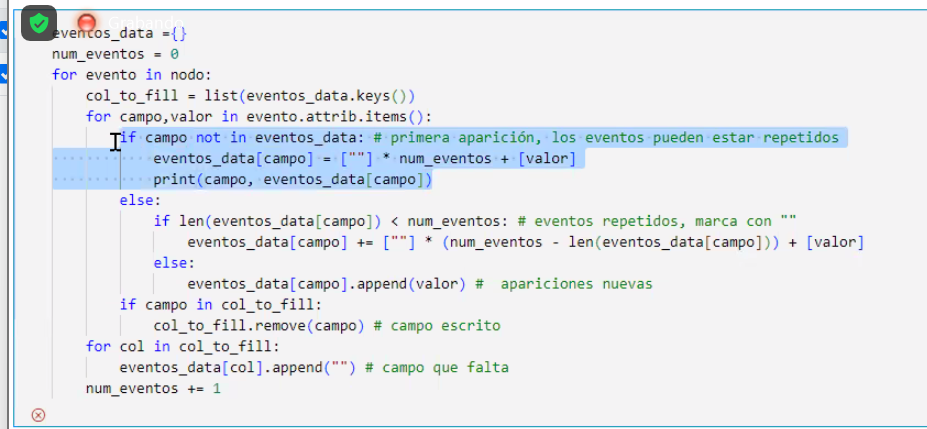

In [16]:
eventos_data = {}
num_eventos = 0
for evento in nodo: 
    col_to_fill = list(eventos_data.keys())
    for campo, valor in evento.attrib.items():
        if campo not in eventos_data: #primera aparición, los eventos pueden estar repetidos
            eventos_data[campo] = [""] * num_eventos+ [valor]
            print(campo,eventos_data[campo])
        else:
            if len(eventos_data[campo]) < num_eventos: # eventos repetidos, marca con ""
                eventos_data[campo] += [""] * (num_eventos - len(eventos_data[campo])) + [valor]
            else: 
                eventos_data[campo].append(valor) # apariciones nuevas
        if campo in col_to_fill: 
            col_to_fill.remove(campo) #campo escrito
    for col in col_to_fill:
        eventos_data[col].append("") # campo que falta
    num_eventos += 1



id ['301038339']
event_id ['1']
type_id ['34']
period_id ['16']
min ['0']
sec ['0']
team_id ['43']
outcome ['1']
x ['0.0']
y ['0.0']
timestamp ['2011-08-21T15:23:06.696']
last_modified ['2011-08-21T15:54:56']
player_id ['', '', '', '', '37572']
keypass ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''